# Team 1 - UFC Fighters


![](https://cdn.vox-cdn.com/thumbor/z_CMbdCm8HZrJh-lKL3GGjSKM-8=/0x0:2440x1627/1200x800/filters:focal(1212x228:1602x618)/cdn.vox-cdn.com/uploads/chorus_image/image/65759283/110_Robbie_Lawler_x_Ben_Askren.0.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rajeevw/ufcdata)._

## Tasks
- General introduction to MMA. 
- Clean the data
- Perform Exploratory Data Analysis on the dataset


# General introduction to UFC - MMA

*   MMA

Mixed martial arts (MMA) is a full-contact combat sport that allows a wide variety of fighting techniques and skills from a mixture of other combat sports to be used in competition. The rules allow usage of both striking and grappling techniques while standing and on the ground. Competitions allow athletes of different backgrounds to compet

Stand-up: Boxing, Kickboxing, Muay Thai, Karate, Taekwondo, Capoeira, Combat Sambo, Savate, and Wushu Sanshou are trained to improve stand-up striking.

Clinch: Judo, Catch Wrestling, Freestyle Wrestling, Greco-Roman wrestling, Luta Livre, Sambo, and Wushu Sanshou are trained to improve clinching, takedowns and throws, while Muay Thai is trained to improve the striking aspect of the clinch.

Ground: Brazilian Jiu-Jitsu, Judo, Sambo, Catch wrestling and Luta Livre are trained to improve ground control and position, as well as to achieve submission holds, and defend against them.

*  UFC

Starting way back on 12th November 1993, the Ultimate Fighting Championship (UFC) looked to find out which of the traditional martial arts was the most effective in a real fighting situation.

With no weight limits and very few rules, competitors would enter a one-night tournament to prove that their style of fighting was the best. 
These one-night tournaments and new sport had its supporters, but due to its lack of rules and self-touted barbaric nature there were many calls to ban it. 

With mounting pressures from local and national government the UFC evolved into what we know it as today.  Weight divisions were included, unified rules made and applied and most importantly, athletic commission involvement.

The biggest and most important change within the UFC though, was the sale from original owners SEG to Zuffa in 2001.  Taking the best elements of other combat sports and also professional wrestling showmanship and presentation, the UFC has turned MMA into the fastest growing sport on the planet.

A match in MMA can end in a number of ways.  You can win either by knockout, technical knockout (referee stoppage), submission, corner stoppage or doctor stoppage (cuts, swelling etc).

Many have tried to label MMA as barbaric, but this couldn’t be further from the truth.  It is an extremely safe sport.  Is there blood?  Sure, but not as much as some would make out and certainly not that much more than boxing.  At its very best, MMA is a technical masterpiece and while it can take a while to fully understand and appreciate all of the technical aspects that can go on in a fight, you need not worry as on every UFC card there is always an exciting fight and each card will generally have at least one stand up (boxing preference) fight.

If you’re new and have heard about the UFC but have not seen it, then try to catch a glimpse and see what the fuss is all about.



## Dataset1: Total fights

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')  # Setting figure style
from matplotlib import colors as mcolors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/raw_total_fight_data.csv', sep=';')
raw_df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        5144 non-null   object
 1   B_fighter        5144 non-null   object
 2   R_KD             5144 non-null   int64 
 3   B_KD             5144 non-null   int64 
 4   R_SIG_STR.       5144 non-null   object
 5   B_SIG_STR.       5144 non-null   object
 6   R_SIG_STR_pct    5144 non-null   object
 7   B_SIG_STR_pct    5144 non-null   object
 8   R_TOTAL_STR.     5144 non-null   object
 9   B_TOTAL_STR.     5144 non-null   object
 10  R_TD             5144 non-null   object
 11  B_TD             5144 non-null   object
 12  R_TD_pct         5144 non-null   object
 13  B_TD_pct         5144 non-null   object
 14  R_SUB_ATT        5144 non-null   int64 
 15  B_SUB_ATT        5144 non-null   int64 
 16  R_PASS           5144 non-null   int64 
 17  B_PASS           5144 non-null   

Column definitions:

*   **R_ and B_  prefix** bold text signifies red and blue corner fighter stats respectively
*   **KD** is number of knockdowns
*   **SIG_STR** is no. of significant strikes 'landed of attempted'
*   **SIG_STR_pct** is significant strikes percentage
*   **TOTAL_STR** is total strikes 'landed of attempted'
*   **TD** is no. of takedowns
*   **TD_pc**t is takedown percentages
*   **SUB_ATT** is no. of submission attempts
*   **PASS** is no. times the guard was passed?
*   **REV** is the no. of moves from an inferior position into a superior position
*   **HEAD** is no. of significant strinks to the head 'landed of attempted'
*   **BODY** is no. of significant strikes to the body 'landed of attempted'
*   **CLINCH** is no. of significant strikes in the clinch 'landed of attempted'
*   **GROUND** is no. of significant strikes on the ground 'landed of attempted'
*   **win_by** is method of win
*   **last_round** is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
*   **last_round_time** is when the fight ended in the last round
*   **Format ** is the format of the fight (3 rounds, 5 rounds etc.)
*   **Referee** is the name of the Ref
*   **date** is the date of the fight
*   **location** is the location in which the event took place
*   **Fight_type** is which weight class and whether it's a title bout or not
*   **Winner** is the winner of the fight

## Dataset2: Fighters info

In [ ]:
fighter_details = pd.read_csv('/content/drive/MyDrive/FTMLE | 2020.11 | Izu/Week_3/assignments/datasets/01-ufc-fight/fighters.csv')
fighter_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [ ]:
fighter_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   Height        3050 non-null   object
 2   Weight        3238 non-null   object
 3   Reach         1569 non-null   object
 4   Stance        2439 non-null   object
 5   DOB           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


# **Cleansing data**


For match dataset
* Check missing values
* Separate ***landed of attempted*** to separate columns
* Extract ***Fight_type*** to get***weight_class***
* Find ***Number_of_rounds*** from ***Format***
* Convert percentages to fractions
* Join fighter datasets to get fighter ***height, reach, weight, age***



For fighters dataset
* Convert Height to cms, Weight to kg
* Convert Reach and Stance to numerical values
* Extract DOB to get year --> get age of fighter

## Dataset1: Total fights

### Check missing values

Match dataset

In [ ]:
# How many missing values are there in the all columns?
df_clean = raw_df.copy()
for column in raw_df.columns:
    if raw_df[column].isnull().sum() != 0:
        print(f"NaN values in {column} = {raw_df[column].isnull().sum()}")

NaN values in Referee = 23
NaN values in Winner = 83


* Referee is not considered in this analysis and can therefore be dropped
* Check the win method to to see why ther are missing values in winner

In [ ]:
raw_df[raw_df['Winner'].isnull()]['win_by'].value_counts()

Overturned              35
Decision - Majority     20
Could Not Continue      13
Decision - Split         8
Decision - Unanimous     5
Other                    2
Name: win_by, dtype: int64

* *Overturned:* means due to drug test being positive 
* *Could not Continue:* means there was an illegal blow which was not enough to be disqualified but the fighter could not continue.
* The rest are different forms of draw

=> Replacing all of these with draw

In [ ]:
df_clean['Winner'] = raw_df['Winner'].fillna('Draw')
df_clean['Winner'].isna().sum()

0

In [ ]:
df_clean['win_by_Decision'] = (raw_df['win_by'] == 'Decision - Unanimous')|(raw_df['win_by'] == 'Decision - Split')| (raw_df['win_by'] == 'Decision - Majority')
df_clean['win_by_KO'] = (raw_df['win_by'] == 'KO/TKO')|(raw_df['win_by'] == "TKO - Doctor's Stoppage")
df_clean['win_by_Submission'] = raw_df['win_by'] == 'Submission'
df_clean['win_by_Other'] = (raw_df['win_by'] == 'DQ')|(raw_df['win_by'] == 'Overturned')|(raw_df['win_by'] == 'Could Not Continue')|(raw_df['win_by'] == 'Other')

### Separate landed of attempted to separate columns

In [ ]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']
        
attempt_suffix = '_att'
landed_suffix = '_landed'

for column in columns:
    df_clean[column+attempt_suffix] = raw_df[column].apply(lambda X: int(X.split('of')[1]))
    df_clean[column+landed_suffix] = raw_df[column].apply(lambda X: int(X.split('of')[0]))
    
df_clean.drop(columns, axis=1, inplace=True)


### Extract Fight_type to get weight_class

In [ ]:
raw_df['Fight_type'].unique()

In [ ]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

In [ ]:
def make_weight_class(X):
    for weight_class in weight_classes:
        if weight_class in X:
            return weight_class
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'

In [ ]:
df_clean['weight_class'] = raw_df['Fight_type'].apply(make_weight_class)

In [ ]:
df_clean['weight_class'].value_counts()

Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: weight_class, dtype: int64

### Find Number of rounds from Format

In [ ]:
# A UFC fight lasts either 3 or 5 rounds. Each round is 5 minutes long
raw_df['Format'].value_counts()

3 Rnd (5-5-5)           4502
5 Rnd (5-5-5-5-5)        423
1 Rnd + OT (12-3)         79
No Time Limit             37
3 Rnd + OT (5-5-5-5)      22
1 Rnd + 2OT (15-3-3)      20
1 Rnd (20)                20
2 Rnd (5-5)               11
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd + OT (27-3)          1
1 Rnd + OT (31-5)          1
1 Rnd + OT (30-3)          1
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: Format, dtype: int64

In [ ]:
def get_no_of_rounds(X):
    if X == 'No Time Limit':
        return 1
    else:
        return len(X.split('(')[1].replace(')', '').split('-'))

df_clean['No_of_rounds'] = raw_df['Format'].apply(get_no_of_rounds)


In [ ]:
df_clean[['No_of_rounds','Format','last_round']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5104,5105,5106,5107,5108,5109,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119,5120,5121,5122,5123,5124,5125,5126,5127,5128,5129,5130,5131,5132,5133,5134,5135,5136,5137,5138,5139,5140,5141,5142,5143
No_of_rounds,5,5,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,3,5,3,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Format,5 Rnd (5-5-5-5-5),5 Rnd (5-5-5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),5 Rnd (5-5-5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),5 Rnd (5-5-5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),3 Rnd (5-5-5),5 Rnd (5-5-5-5-5),3 Rnd (5-5-5),...,1 Rnd (20),1 Rnd (20),1 Rnd (20),No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit,No Time Limit
last_round,3,2,2,3,3,3,3,3,1,3,3,2,3,4,1,2,3,3,3,3,1,2,2,3,2,4,3,1,1,2,3,3,3,1,2,1,3,3,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Change to Datetime data

In [ ]:
df_clean['date'] = pd.to_datetime(raw_df['date'])
df_clean['date'].sample(5)

1700   2015-11-21
4567   2006-07-08
4519   2006-10-14
2844   2013-06-08
1747   2015-10-24
Name: date, dtype: datetime64[ns]

### Convert percentages to fractions

In [ ]:
pct_columns = ['R_SIG_STR_pct','B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']

def pct_to_frac(X):
    if X != '---':
        return float(X.replace('%', ''))/100
    else:
        # if '---' means it's taking pct of `0 of 0`. 
        return 0

for column in pct_columns:
    df_clean[column] = raw_df[column].apply(pct_to_frac)

In [ ]:
df_clean.info()

## Dataset2: Fighters

In [ ]:
fighter_clean  = fighter_details.copy()

In [ ]:
for col in fighter_details.columns:
    print(f"Number of NaN in {col} : {fighter_details[col].isnull().sum()}")

Number of NaN in fighter_name : 0
Number of NaN in Height : 263
Number of NaN in Weight : 75
Number of NaN in Reach : 1744
Number of NaN in Stance : 874
Number of NaN in DOB : 740


### Convert to Height, Reach to cms

In [ ]:
def convert_to_cms(X):
    if X is np.NaN:
        return X
    elif len(X.split("'")) == 2:
        feet = float(X.split("'")[0])
        inches = int(X.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(X.replace('"','')) * 2.54

In [ ]:
fighter_clean['Height_cms'] = fighter_details['Height'].apply(convert_to_cms)
fighter_clean['Reach_cms'] = fighter_details['Reach'].apply(convert_to_cms)

### Convert Weight to float(lbs)

In [ ]:
fighter_clean['Weight_lbs'] = fighter_details['Weight'].apply(lambda X: float(X.replace(' lbs.', '')) if X is not np.NaN else X)

### Change datetime DOB

In [ ]:
fighter_clean['DOB'] = pd.to_datetime(fighter_details['DOB'] )

In [ ]:
fighter_clean.drop(['Height', 'Weight', 'Reach'], axis=1, inplace=True)

In [ ]:
fighter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fighter_name  3313 non-null   object        
 1   Stance        2439 non-null   object        
 2   DOB           2573 non-null   datetime64[ns]
 3   Height_cms    3050 non-null   float64       
 4   Reach_cms     1569 non-null   float64       
 5   Weight_lbs    3238 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 155.4+ KB


## Merge fighters and matches df

In [ ]:
r_merge_df = df_clean.merge(fighter_clean, left_on='R_fighter', right_on='fighter_name', how='left')
r_merge_df.rename(columns={'Height_cms':'R_Height',
                          'Weight_lbs':'R_Weight',
                          'Reach_cms':'R_Reach',
                          'Stance':'R_Stance',
                          'DOB':'R_DOB',
                          'year': 'R_year'}, 
                 inplace=True)
r_merge_df.drop('fighter_name', axis=1, inplace=True)

merge_df = r_merge_df.merge(fighter_clean, left_on='B_fighter', right_on='fighter_name', how='left')
merge_df.rename(columns={'Height_cms':'B_Height',
                          'Weight_lbs':'B_Weight',
                          'Reach_cms':'B_Reach',
                          'Stance':'B_Stance',
                          'DOB':'B_DOB',
                          'year': 'B_year'}, 
                 inplace=True)

merge_df.drop('fighter_name', axis=1, inplace=True)


In [ ]:
merge_df.isnull().sum().sort_values()

R_fighter        0
R_TD_att         0
R_TD_landed      0
B_TD_landed      0
R_HEAD_att       0
              ... 
R_Stance       134
B_Stance       159
B_DOB          172
R_Reach        316
B_Reach        666
Length: 75, dtype: int64

### Get the age of the fighters by the time they fight

In [ ]:
merge_df['R_age'] = merge_df['date'].dt.year - merge_df['R_DOB'].dt.year
merge_df['B_age'] = merge_df['date'].dt.year - merge_df['B_DOB'].dt.year
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5144 entries, 0 to 5143
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   R_fighter            5144 non-null   object        
 1   B_fighter            5144 non-null   object        
 2   R_KD                 5144 non-null   int64         
 3   B_KD                 5144 non-null   int64         
 4   R_SIG_STR_pct        5144 non-null   float64       
 5   B_SIG_STR_pct        5144 non-null   float64       
 6   R_TD_pct             5144 non-null   float64       
 7   B_TD_pct             5144 non-null   float64       
 8   R_SUB_ATT            5144 non-null   int64         
 9   B_SUB_ATT            5144 non-null   int64         
 10  R_PASS               5144 non-null   int64         
 11  B_PASS               5144 non-null   int64         
 12  R_REV                5144 non-null   int64         
 13  B_REV                5144 non-nul

# Exploring data

## Find the overall trend of fights over the years

In [ ]:
merge_df['fight_year'] = pd.to_datetime(merge_df['date']).dt.year
merge_df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,win_by_Decision,win_by_KO,win_by_Submission,win_by_Other,R_SIG_STR._att,R_SIG_STR._landed,B_SIG_STR._att,B_SIG_STR._landed,R_TOTAL_STR._att,R_TOTAL_STR._landed,B_TOTAL_STR._att,B_TOTAL_STR._landed,R_TD_att,R_TD_landed,B_TD_att,B_TD_landed,R_HEAD_att,R_HEAD_landed,B_HEAD_att,B_HEAD_landed,R_BODY_att,R_BODY_landed,B_BODY_att,B_BODY_landed,R_LEG_att,R_LEG_landed,B_LEG_att,B_LEG_landed,R_DISTANCE_att,R_DISTANCE_landed,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed,weight_class,No_of_rounds,R_Stance,R_DOB,R_Height,R_Reach,R_Weight,B_Stance,B_DOB,B_Height,B_Reach,B_Weight,R_age,B_age,fight_year
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,1,0,0,0,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,2019-06-08,"Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,False,True,False,False,171,90,119,57,182,99,121,59,4,1,2,0,150,73,89,35,16,13,8,7,5,4,22,15,118,45,116,54,23,19,2,2,30,26,1,1,Bantamweight,5,Orthodox,1987-02-09,162.56,162.56,135.0,Orthodox,1988-04-26,167.64,170.18,135.0,32.0,31.0,2019
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,3,0,0,0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,False,True,False,False,11,8,12,2,40,37,52,42,2,2,0,0,5,4,7,0,6,4,2,0,0,0,3,2,8,5,12,2,2,2,0,0,1,1,0,0,Women's Flyweight,5,Southpaw,1988-03-07,165.10,167.64,125.0,Orthodox,1986-07-27,167.64,167.64,125.0,31.0,33.0,2019
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,0,0,0,0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,False,True,False,False,200,104,185,68,200,104,185,68,0,0,1,1,144,65,152,43,37,25,23,15,19,14,10,10,198,103,184,68,2,1,1,0,0,0,0,0,Lightweight,3,Orthodox,1984-02-12,180.34,193.04,155.0,Orthodox,1983-03-29,185.42,185.42,155.0,35.0,36.0,2019
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,0,1,0,0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,True,False,False,False,192,73,189,56,195,76,192,58,3,0,3,1,145,42,166,40,24,15,19,13,23,16,4,3,173,60,167,42,15,9,12,10,4,4,10,4,Bantamweight,3,Orthodox,1989-06-29,162.56,172.72,135.0,Switch,1993-02-11,170.18,170.18,135.0,30.0,26.0,2019
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,0,0,0,0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,True,False,False,False,144,64,123,73,146,66,131,81,0,0,2,2,114,39,114,65,7,6,8,7,23,19,1,1,126,50,111,62,18,14,6,5,0,0,6,6,Heavyweight,3,Southpaw,1993-03-16,187.96,190.50,264.0,Southpaw,1986-10-09,180.34,185.42,250.0,26.0,33.0,2019


In [ ]:
# Number of matchs over years:
matchs_by_year = merge_df.groupby('fight_year', as_index=False)['date'].count()

# Number of fighter over years:
R_fighter = merge_df[['R_fighter','fight_year','Winner']].rename({'R_fighter': 'Fighter'}, axis='columns')
B_fighter = merge_df[['B_fighter','fight_year','Winner']].rename({'B_fighter': 'Fighter'}, axis='columns')
RB_fighter = R_fighter.append(B_fighter)
fighters_by_year = RB_fighter.groupby('fight_year', as_index=False)['Fighter'].nunique()

In [ ]:
year_list = matchs_by_year['fight_year'].to_list()
match_by_year = matchs_by_year['date'].to_list()
fighter_by_year = fighters_by_year['Fighter'].to_list()

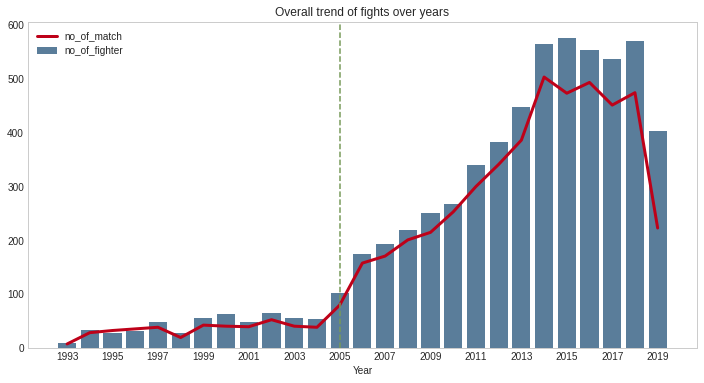

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(year_list, match_by_year, color ='xkcd:scarlet' ,  lw=3, label='no_of_match')  
ax.bar(year_list, fighter_by_year, color ='xkcd:steel blue', label = 'no_of_fighter')  
ax.set(xlabel='Year', 
       title='Overall trend of fights over years',
       xticks= range(min(year_list), max(year_list)+1,2))
ax.grid(False)
ax.legend(loc='upper left')
ax.axvline(x = 2005, color = 'xkcd:moss', ls = '--')
plt.show()

## Win_by over year

In [ ]:
merge_df['win_by'].unique()

array(['KO/TKO', "TKO - Doctor's Stoppage", 'Decision - Unanimous',
       'Submission', 'Decision - Split', 'Decision - Majority', 'DQ',
       'Overturned', 'Could Not Continue', 'Other'], dtype=object)

In [ ]:
Decision = merge_df.groupby('fight_year', as_index=False)['win_by_Decision'].mean()['win_by_Decision'].to_list()
KO_TKO = merge_df.groupby('fight_year', as_index=False)['win_by_KO'].mean()['win_by_KO'].to_list()
Submission = merge_df.groupby('fight_year', as_index=False)['win_by_Submission'].mean()['win_by_Submission'].to_list()
Others = merge_df.groupby('fight_year', as_index=False)['win_by_Other'].mean()['win_by_Other'].to_list()

In [ ]:
data = {
    'KO_TKO': merge_df['win_by_Decision'].sum(),
    'Submission': merge_df['win_by_KO'].sum(),
    'Decision': merge_df['win_by_Submission'].sum(),
    'Others': merge_df['win_by_Other'].sum(),
}

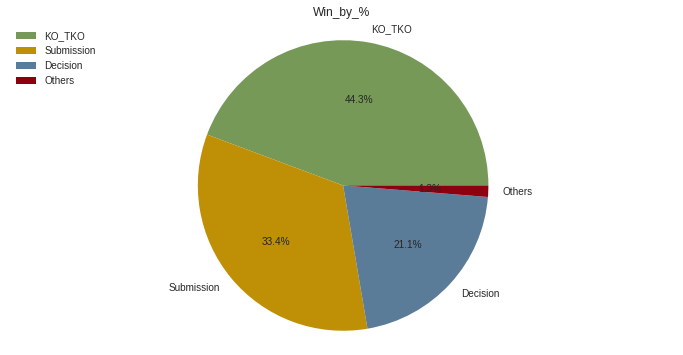

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', colors=['xkcd:moss', 'xkcd:ochre','xkcd:slate blue', 'xkcd:crimson'])
ax.set(title='Win_by_%')
ax.axis('equal')
ax.legend(loc='upper left')

plt.show()

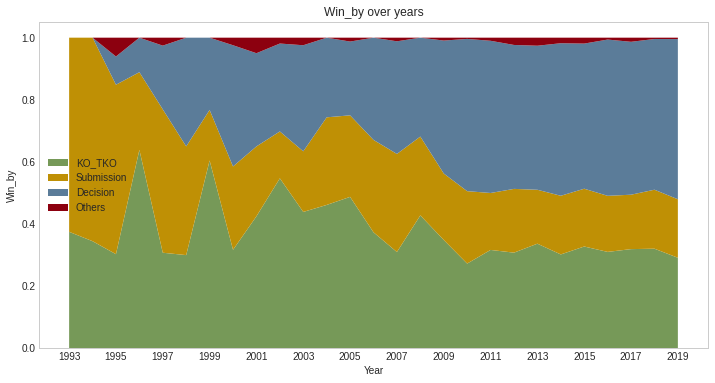

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.stackplot(year_list, KO_TKO, Submission,Decision,Others,labels=data.keys(),colors=['xkcd:moss', 'xkcd:ochre','xkcd:slate blue', 'xkcd:crimson'])
ax.set(title='Win_by over years',
       xlabel='Year',
       ylabel='Win_by',
       xticks= range(min(year_list), max(year_list)+1,2))
ax.grid(False)
ax.legend(loc='center left')

plt.show()

In [ ]:
weight_list = list(merge_df['weight_class'].unique())

In [ ]:
Decision_WC = np.array(merge_df.groupby('weight_class', as_index=False)['win_by_Decision'].mean()['win_by_Decision'].to_list())
KO_TKO_WC = np.array(merge_df.groupby('weight_class', as_index=False)['win_by_KO'].mean()['win_by_KO'].to_list())
Submission_WC = np.array(merge_df.groupby('weight_class', as_index=False)['win_by_Submission'].mean()['win_by_Submission'].to_list())
Others_WC = np.array(merge_df.groupby('weight_class', as_index=False)['win_by_Other'].mean()['win_by_Other'].to_list())

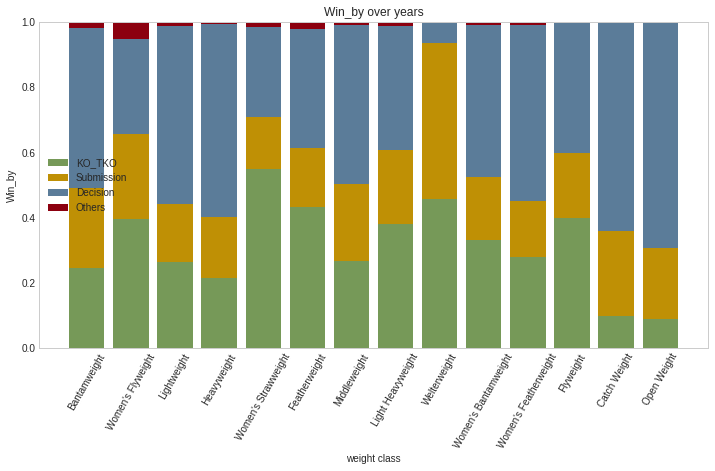

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(weight_list, KO_TKO_WC , label = 'KO_TKO' , color = 'xkcd:moss')
ax.bar(weight_list, Submission_WC, label = 'Submission', color = 'xkcd:ochre',bottom=KO_TKO_WC)
ax.bar(weight_list, Decision_WC, label = 'Decision', color = 'xkcd:slate blue', bottom= KO_TKO_WC + Submission_WC)
ax.bar(weight_list, Others_WC, label = 'Others', color = 'xkcd:crimson', bottom=KO_TKO_WC + Submission_WC+Decision_WC)
ax.set(title='Win_by over years',
       xlabel='weight class',
       ylabel='Win_by',
      )
plt.xticks(label = weight_list , rotation=60)
ax.grid(False)
ax.legend(loc='center left')

plt.show()

## The rhythm & flow of fighting

In [ ]:
merge_df[['last_round','No_of_rounds','win_by_KO','win_by_Submission']]

In [ ]:
df1 = merge_df.groupby('last_round', as_index=False).count()[['last_round','No_of_rounds']]
df2 = merge_df.groupby('last_round', as_index=False).sum()['win_by_KO']
df3 = merge_df.groupby('last_round', as_index=False).sum()['win_by_Submission']

In [ ]:
finish = pd.concat([df1, df2, df3], axis=1, sort=False)
finish

,last_round,No_of_rounds,win_by_KO,win_by_Submission
0,1,1568,954,579
1,2,865,497,330
2,3,2526,236,156
3,4,30,19,11
4,5,155,11,7


In [ ]:
finish['Chance_to_finish'] = finish['No_of_rounds']/finish['No_of_rounds'].sum()
finish['Chance_to_KO_TKO'] = finish['win_by_KO']/finish['No_of_rounds'].sum()
finish['Chance_to_Submission'] = finish['win_by_Submission']/finish['No_of_rounds'].sum()

In [ ]:
finish

,last_round,No_of_rounds,win_by_KO,win_by_Submission,Chance_to_finish,Chance_to_KO_TKO,Chance_to_Submission
0,1,1568,954,579,0.304821,0.185459,0.112558
1,2,865,497,330,0.168157,0.096617,0.064152
2,3,2526,236,156,0.491058,0.045879,0.030327
3,4,30,19,11,0.005832,0.003694,0.002138
4,5,155,11,7,0.030132,0.002138,0.001361


In [ ]:
Chance_to_finish = finish['Chance_to_finish'].to_list()
Chance_to_KO_TKO = finish['Chance_to_KO_TKO'].to_list()
Chance_to_Submission = finish['Chance_to_Submission'].to_list()
last_round = np.array(finish['last_round'].to_list())

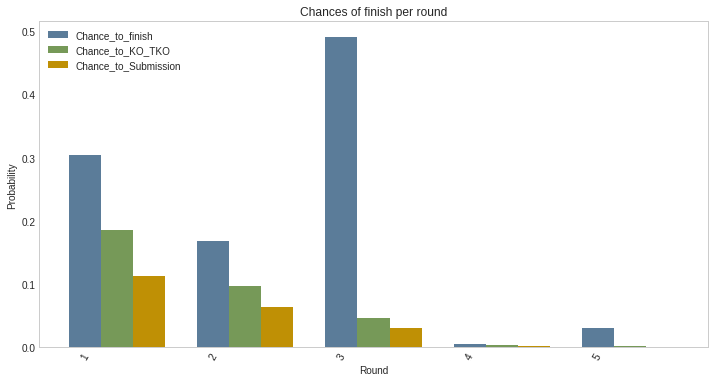

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

ax.bar(last_round + 0.00, Chance_to_finish , width=bar_width, label = 'Chance_to_finish' , color = 'xkcd:slate blue')
ax.bar(last_round + 0.25, Chance_to_KO_TKO,  width=bar_width,label = 'Chance_to_KO_TKO', color ='xkcd:moss' )
ax.bar(last_round + 0.5, Chance_to_Submission,  width=bar_width, label = 'Chance_to_Submission', color ='xkcd:ochre' )

ax.set(title='Chances of finish per round',
       ylabel= 'Probability',
       xlabel='Round'
      )
plt.xticks(label =last_round , rotation=60)
ax.grid(False)
ax.legend(loc='upper left')

plt.show()

## Top-Ranking

In [ ]:
RB_fighter['Winner_T'] = RB_fighter['Winner'] == RB_fighter['Fighter']

In [ ]:
RB_fighter

,Fighter,fight_year,Winner,Winner_T
0,Henry Cejudo,2019,Henry Cejudo,True
1,Valentina Shevchenko,2019,Valentina Shevchenko,True
2,Tony Ferguson,2019,Tony Ferguson,True
3,Jimmie Rivera,2019,Petr Yan,False
4,Tai Tuivasa,2019,Blagoy Ivanov,False
...,...,...,...,...
5139,Kevin Rosier,1993,Gerard Gordeau,False
5140,Patrick Smith,1993,Ken Shamrock,False
5141,Art Jimmerson,1993,Royce Gracie,False
5142,Zane Frazier,1993,Kevin Rosier,False


In [ ]:
top_fights = RB_fighter.groupby('Fighter')['fight_year'].count().sort_values(ascending=False)[:20].to_frame()
top_wins = RB_fighter.groupby('Fighter')['Winner_T'].sum().sort_values(ascending=False)[:20].to_frame()

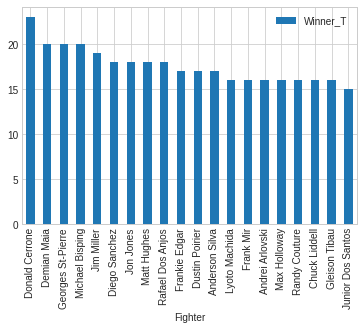

In [ ]:
top_wins.plot(kind='bar')